<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/iri_BankMkt_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset EDA

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

In [402]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
from pandas._libs import index
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier  

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

Mounting Google Drive to Colab Environment

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading data


###Input variables:

* bank client data 

  1. age (numeric)
  2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
  4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
  5. default: has credit in default? (categorical: 'no','yes','unknown')
  6. housing: has housing loan? (categorical: 'no','yes','unknown')
  7. loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* related with the last contact of the currennt campaign
  8. contact: contact communication type (categorical: "cellular","telephone") 
  9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
  10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
### Note: The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

* other attributes  
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numeric)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) (numeric: from 0 to 999) 
  14. previous: number of contacts performed before this campaign and for this client (numeric) (numeric: from 0 to 6)
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

* social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric) numeric: from -3.4 to 1.4) 
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     (numeric: from 92.2 to 94.77) 
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)    (numeric: from -50.8 to -26.9) 
  19. euribor3m: euribor 3 month rate - daily indicator (numeric) (computed by the European Central Bank (ECB) and published by Thomson Reuters, i.e., a publicly available and widely used index) (numeric: from 0.635 to 5.045) 
  20. nr.employed: number of employees - quarterly indicator (numeric) from 4964 to 5228) 

* Output variable (desired target):
  21. y. has the client subscribed a term deposit? (binary: 'yes','no')
According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In [363]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [295]:
# data_Dictionary = pd.read_excel('....')
# data_Dictionary

In [366]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56,57,37,40,56,45,59,41,24,25,41,25,29,57,35
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,blue-collar,services,blue-collar,housemaid,blue-collar
marital,married,married,married,married,married,married,married,married,single,single,married,single,single,divorced,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,unknown,high.school,high.school,basic.4y,basic.6y
default,no,unknown,no,no,no,unknown,no,unknown,no,no,unknown,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,no,yes,no,yes,yes
loan,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may,may,may,may,may,may,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [368]:
print('Shape of dataframe:', data.shape)

Shape of dataframe: (41188, 21)


In [369]:
# display the data types and store into a variable
dt = data.dtypes
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [370]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [374]:
TARGET = 'y'

In [375]:
#Checking Unique values of each variable
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [376]:
objList = []
intList = []
floatList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
  print(i)

OBJECTS
-------
job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


INTEGERS
--------
age
duration
campaign
pdays
previous


FLOATS
------
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [308]:
for col in objList:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']


In [309]:
for col in intList:
    print(col)
    print(data[col].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]


In [310]:
for col in floatList:
    print(col)
    print(data[col].unique())

emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.42

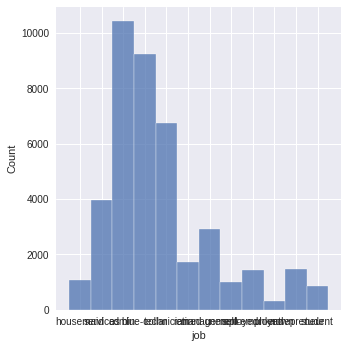

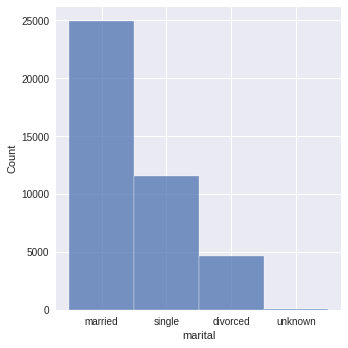

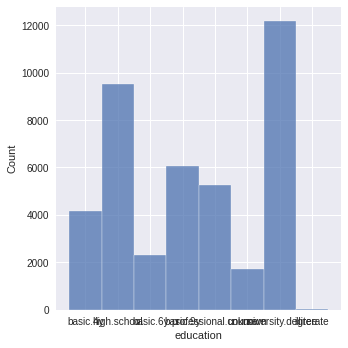

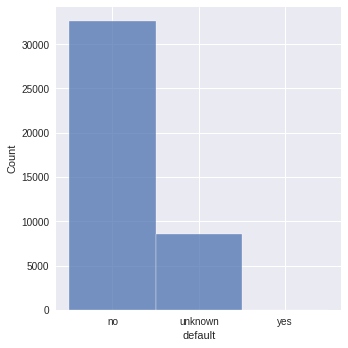

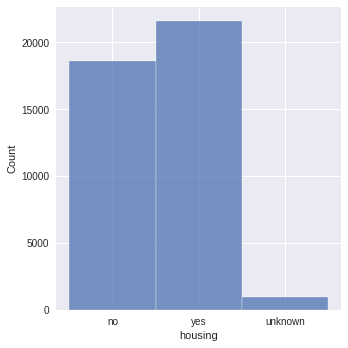

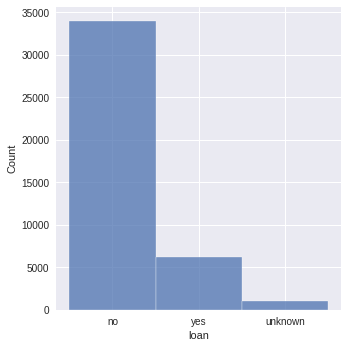

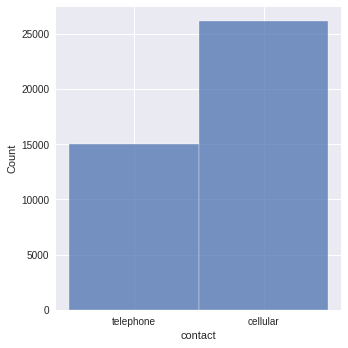

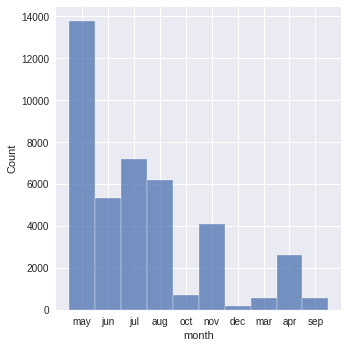

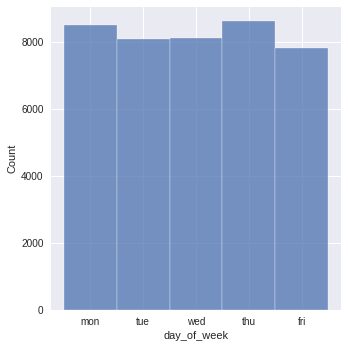

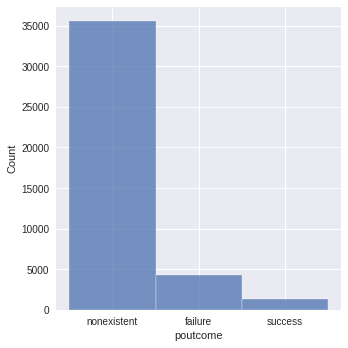

In [384]:
# # (density = 0 counts density =1 percentage)

# for i in objList:
#     plt.hist(data[i], density = 0, alpha = 0.7, bins=20)
#     plt.xlabel(i)
#     plt.show()..............or......

for i in objList:
  sns.displot(data[i], bins=30)

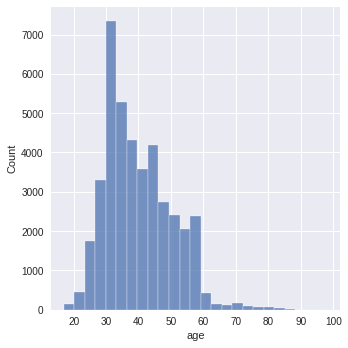

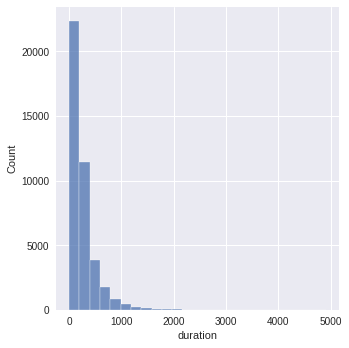

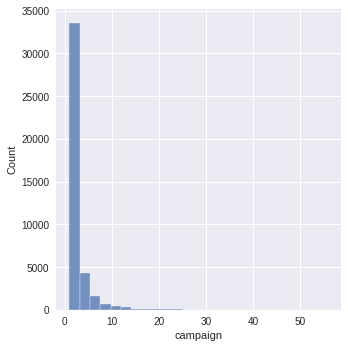

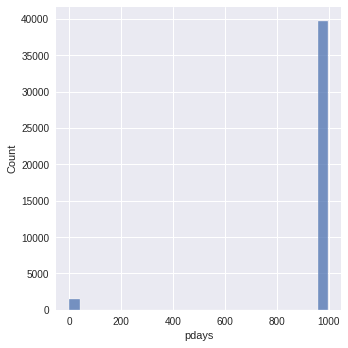

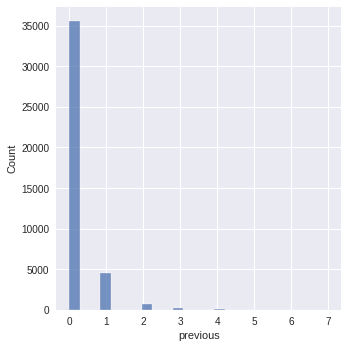

In [388]:
for i in intList:
  sns.displot(data[i], bins=25)

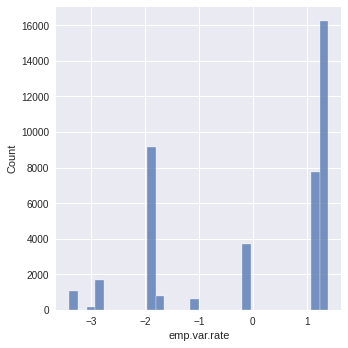

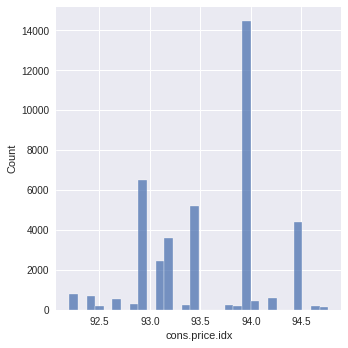

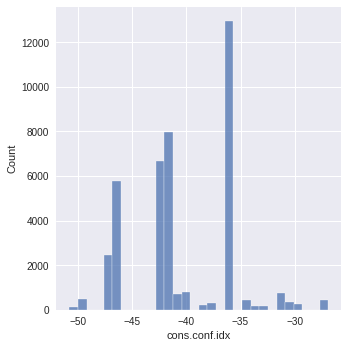

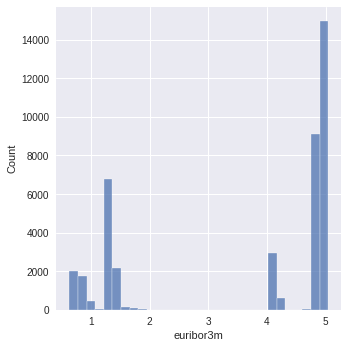

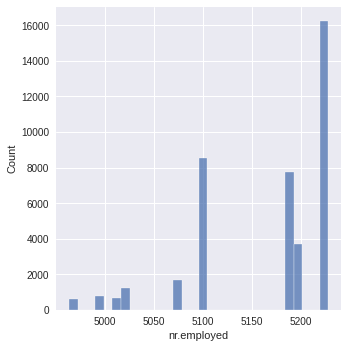

In [389]:
for i in floatList:
  sns.displot(data[i], bins=30)

In [391]:
data['nr.employed'].value_counts(normalize='True')

5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64

In [390]:
data['previous'].value_counts(normalize='True')

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

In [392]:
#Distribution of the Target'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data[TARGET].value_counts(normalize='True')

no     0.887346
yes    0.112654
Name: y, dtype: float64

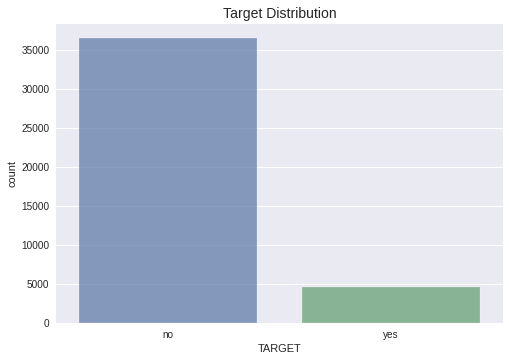

In [396]:
sns.countplot(data[TARGET], alpha = 0.7)
plt.title("Target Distribution", fontsize=14)
plt.xlabel('TARGET')
plt.show()



In [398]:
#replacing no and yes by 0 and 1 respectively as our target values!
data[TARGET] = data[TARGET].replace(['no','yes'],[0,1])
data[TARGET].unique()

array([0, 1])

In [399]:
################################################### Drop 'duration' column #####. not sure about "campaign"
data = data.drop('duration', axis=1)

In [400]:
data.shape

(41188, 20)

In [401]:
data.corr().T

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


<Figure size 576x396 with 0 Axes>

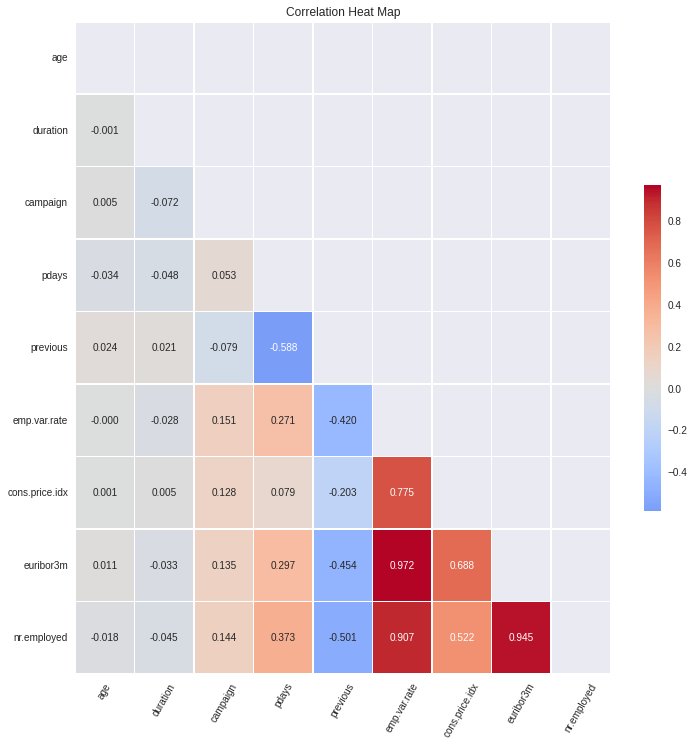

In [404]:
heat_map_corr(map_corr=corr_list_test)

In [405]:
# use one hot encoding to transform the categorical variables into numeric variables
for i in objList :
    print('Class = ', i )
    thePrefix = 'z_' + i
    print( thePrefix )
    y = pd.get_dummies(data[i], prefix = thePrefix, dummy_na = False) 
    print(type(y)) 
    print(y.head().T )
    data = pd.concat([data, y], axis = 1 )
    data = data.drop(i, axis = 1 )

Class =  job
z_job
<class 'pandas.core.frame.DataFrame'>
                     0  1  2  3  4
z_job_admin.         0  0  0  1  0
z_job_blue-collar    0  0  0  0  0
z_job_entrepreneur   0  0  0  0  0
z_job_housemaid      1  0  0  0  0
z_job_management     0  0  0  0  0
z_job_retired        0  0  0  0  0
z_job_self-employed  0  0  0  0  0
z_job_services       0  1  1  0  1
z_job_student        0  0  0  0  0
z_job_technician     0  0  0  0  0
z_job_unemployed     0  0  0  0  0
z_job_unknown        0  0  0  0  0
Class =  marital
z_marital
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
z_marital_divorced  0  0  0  0  0
z_marital_married   1  1  1  1  1
z_marital_single    0  0  0  0  0
z_marital_unknown   0  0  0  0  0
Class =  education
z_education
<class 'pandas.core.frame.DataFrame'>
                                 0  1  2  3  4
z_education_basic.4y             1  0  0  0  0
z_education_basic.6y             0  0  0  1  0
z_education_basic.9y             0  0  0  0

In [407]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56.0,57.0,37.0,40.0,56.0,45.0,59.0,41.0,24.0,25.0,41.0,25.0,29.0,57.0,35.0
campaign,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pdays,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0
previous,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emp.var.rate,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z_day_of_week_tue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z_day_of_week_wed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z_poutcome_failure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z_poutcome_nonexistent,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [408]:
data.shape

(41188, 63)

Split data

In [409]:
# create a copy of the data set
x = data.copy()
x.head().T

,0,1,2,3,4
age,56.0,57.0,37.0,40.0,56.0
campaign,1.0,1.0,1.0,1.0,1.0
pdays,999.0,999.0,999.0,999.0,999.0
previous,0.0,0.0,0.0,0.0,0.0
emp.var.rate,1.1,1.1,1.1,1.1,1.1
...,...,...,...,...,...
z_day_of_week_tue,0.0,0.0,0.0,0.0,0.0
z_day_of_week_wed,0.0,0.0,0.0,0.0,0.0
z_poutcome_failure,0.0,0.0,0.0,0.0,0.0
z_poutcome_nonexistent,1.0,1.0,1.0,1.0,1.0


In [410]:
#Prepare the data to be used to build the decision tree, drop TARGET 

x = x.drop( TARGET, axis = 1 )
x.head().T

,0,1,2,3,4
age,56.0,57.0,37.0,40.0,56.0
campaign,1.0,1.0,1.0,1.0,1.0
pdays,999.0,999.0,999.0,999.0,999.0
previous,0.0,0.0,0.0,0.0,0.0
emp.var.rate,1.1,1.1,1.1,1.1,1.1
...,...,...,...,...,...
z_day_of_week_tue,0.0,0.0,0.0,0.0,0.0
z_day_of_week_wed,0.0,0.0,0.0,0.0,0.0
z_poutcome_failure,0.0,0.0,0.0,0.0,0.0
z_poutcome_nonexistent,1.0,1.0,1.0,1.0,1.0


In [411]:
# store the target into a dataframe

y = data[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [412]:
# Splitting dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [413]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set = ', x_train.shape)
print('Shape of output TRAINING data set = ', y_train.shape, '\n')
print('Shape of input TEST data set = ', x_test.shape)
print('Shape of output TEST data set = ', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (41188, 62)
Shape of original OUTPUT data set: (41188, 1) 

Shape of input TRAINING data set =  (32950, 62)
Shape of output TRAINING data set =  (32950, 1) 

Shape of input TEST data set =  (8238, 62)
Shape of output TEST data set =  (8238, 1)


In [414]:
# display the first five records in the train var. data set
x_train.head().T

,32694,39374,13543,37649,13150
age,30.0,58.0,32.0,26.0,48.0
campaign,1.0,4.0,1.0,1.0,1.0
pdays,999.0,999.0,999.0,999.0,999.0
previous,0.0,0.0,0.0,1.0,0.0
emp.var.rate,-1.8,-1.8,1.4,-2.9,1.4
...,...,...,...,...,...
z_day_of_week_tue,0.0,0.0,0.0,1.0,0.0
z_day_of_week_wed,0.0,0.0,0.0,0.0,1.0
z_poutcome_failure,0.0,0.0,0.0,1.0,0.0
z_poutcome_nonexistent,1.0,1.0,1.0,0.0,1.0


In [332]:
# display the first five records in the train predictions data set

y_train.head().T

,32694,39374,13543,37649,13150
y,0,0,0,1,0


###Decision Tree classification task

In [417]:
# create decision tree classifier my_tree setting 4-level deep with respect of TARGET
# fit the decision tree 

my_tree = tree.DecisionTreeClassifier (max_depth = 4) 
my_tree = my_tree.fit (x_train, y_train [ TARGET]) 

In [418]:
# predict subscription chances for the training and test data

y_Pred_train = my_tree.predict(x_train)
y_Pred_test = my_tree.predict(x_test)

In [419]:
# calculate the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets

print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the model based on the training data set is  0.9008801213960547
The accuracy of the model based on the test data set is  0.8971837824714737


Decision tree is 90% accurate, meaning that 90% of the time my predictions were correct for the training data set. Decision tree is 90% accurate, meaning that 90% of the time my predictions were correct for the test data set. The two values testing the accuracy on training and test data are very close meaning that the model is a good model.

RECEIVER OPERATING CHARACTERISTICS (ROC) CURVE


*   An ROC curve plots TPR vs. FPR at different classification thresholds.
*   Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

In [420]:
# predict probability for training data set
probs = my_tree.predict_proba(x_train)

In [424]:
# display the first ten probabilities for training data set
probs[0:10]

array([[0.94656546, 0.05343454],
       [0.79069767, 0.20930233],
       [0.94656546, 0.05343454],
       [0.79069767, 0.20930233],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454]])

On the training data set:
    The first person has a probability of 95% chance of subscribing and 0.5% chance of not 
                       

In [425]:
# prediction for the first 10 people; .....out of the first ten recods, none is predicted to subscribe
y_Pred_train [0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [428]:
# probability subscription for test data set
p1 = probs[:,1]

# display the subsc probability for the first 10 records for test data set
p1[0:10]


array([0.05343454, 0.20930233, 0.05343454, 0.20930233, 0.05343454,
       0.05343454, 0.05343454, 0.05343454, 0.05343454, 0.05343454])

In [429]:
# predict probability for test data set

probs = my_tree.predict_proba(x_test)
probs[0:10]

array([[0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.86298215, 0.13701785],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454],
       [0.94656546, 0.05343454]])

In [431]:
'''
TRAINING DATA
False positive rate (1 - SPECIFICITY) shows the proportion of subsc incorrectly classified as non-subscribers
True positive rate (SENSITIVITY) shows the proportion of subsc correctly classified
'''
fpr_train, tpr_train, treshhold = metrics.roc_curve (y_train [TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [432]:
# probability subscribers for test data set
p1 = probs[:,1]

# display the deposit subscribers probability for the first 10 records for test data set
p1[0:10]

array([0.05343454, 0.05343454, 0.13701785, 0.05343454, 0.05343454,
       0.05343454, 0.05343454, 0.05343454, 0.05343454, 0.05343454])

In [433]:
## TEST DATA
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [434]:
# False Positive Rate for first 10 records for training data set 
fpr_train[0:10] 

array([0.00000000e+00, 6.83667191e-05, 4.85403705e-03, 5.26423737e-03,
       7.55452246e-03, 8.81930676e-03, 1.27162097e-02, 2.87482054e-02,
       3.31920421e-02, 7.09646544e-02])

In [346]:
# True Positive Rate for first 10 records for training data set 
tpr_train[0:10]

array([0.        , 0.14556277, 0.15313853, 0.31872294, 0.32169913,
       0.33522727, 0.45238095, 0.4978355 , 0.5530303 , 0.58008658])

In [435]:
# False Positive Rate for first 10 records for test data set 
fpr_test[0:10]

array([0.        , 0.0001371 , 0.00507266, 0.00603236, 0.00863724,
       0.00987113, 0.01439539, 0.02961338, 0.03468604, 0.07375925])

In [436]:
# Test Positive Rate for first 10 records for test data set 
tpr_test[0:10]

array([0.        , 0.00105932, 0.13241525, 0.14194915, 0.16525424,
       0.17902542, 0.20127119, 0.31144068, 0.34745763, 0.51694915])

In [437]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

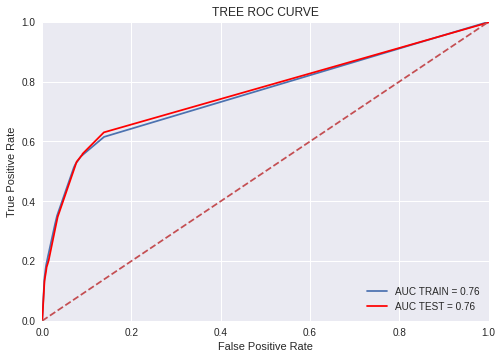

In [438]:
# print ROC curve using matplotlib for training and test data 

plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The larger the area under the curve (or the higher the ROC curve), the better is the performance. The ROC in the figure has a high AUC (area under the curve).  We can also see there’s a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. If we go back and look at our business need, we needed a high TPR and low FPR that is exactly what we are getting from that point on this ROC. The threshold corresponding to that point can be said to be the best threshold value. The diagonal line represents the values where the true positive rate is equal to the false positive rate. The blue line represents the ROC curve for the training data set and its AUC is 91%. The red line represents the ROC curve for the test training set and its AUC is 90%. The test data and the training data are very close in values.




 VISUALIZATION OF THE TREE

In [439]:
feature_cols = list(x.columns.values) 
tree.export_graphviz(my_tree, out_file = 'BANK.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['YES', 'NO'])

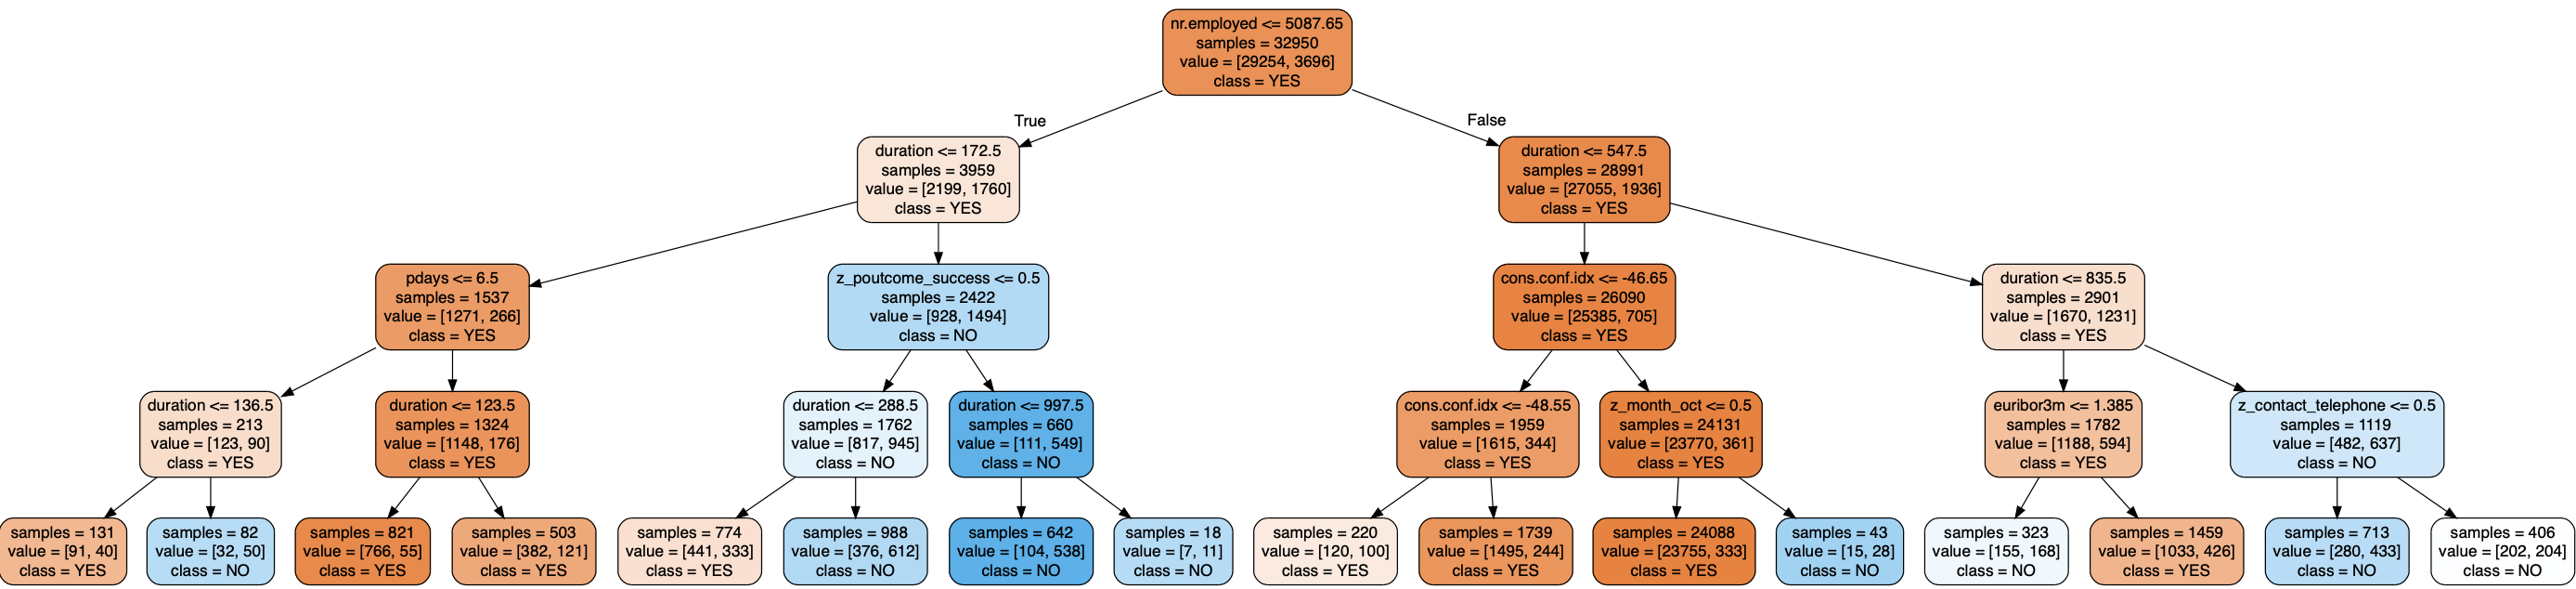

TRUE
The root node, the best indicator for whether or not....

Decision Tree has the advantage of narrowing down thousands of variables and select only the important ones for accurate prediction.

In [440]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [441]:
vars_tree_flag = getTreeVars( my_tree, feature_cols )

In [442]:
for i in vars_tree_flag:
    print(i)

campaign
pdays
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
z_contact_cellular
z_month_apr
z_job_housemaid
z_month_oct
z_day_of_week_mon
z_poutcome_success
z_education_professional.course


These are the only variables that will be used and are predictive of deposit subscription.